Desafío Spike



In [54]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
from time import strptime

1. Datos: Precipitaciones, Indicadores Económicos Banco Central


• Cargar archivo precipitaciones.csv con las precipitaciones medias mensuales
registradas entre enero 1979 y abril 2020. (Unidad: mm).
 
• Cargar archivo banco_central.csv con variables económicas.

In [55]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [56]:
!ls "/content/gdrive/MyDrive/dataspike"

banco_central.csv  precipitaciones.csv	    result2.csv
precio_leche.csv   precipitaciones_ord.csv


In [57]:
df_precipitaciones_ord = pd.read_csv (r'/content/gdrive/MyDrive/dataspike/precipitaciones_ord.csv')
print(df_precipitaciones_ord)

          date   Coquimbo  Valparaiso  ...      Biobio  La_Araucania    Los_Rios
0   2013-01-01  10.155732    9.476023  ...   10.610359     21.286717   36.419186
1   2013-02-01   2.662333    3.329740  ...   49.439734     84.571386  161.760892
2   2013-03-01   0.282052    2.228588  ...   11.977028     36.493313   73.323954
3   2013-04-01   0.142111    1.629529  ...   42.941649     95.051980  176.105375
4   2013-05-01  59.775399  114.732581  ...  288.971343    289.062544  380.996731
..         ...        ...         ...  ...         ...           ...         ...
83  2019-12-01   0.287895    0.165390  ...   14.014122     27.321858   62.170090
84  2020-01-01   3.299797    2.003685  ...   19.518225     35.916618   63.389625
85  2020-02-01   0.179216    0.003701  ...   10.108504     29.001988   55.838889
86  2020-03-01   0.003451    0.000666  ...   12.462699     28.310937   73.640866
87  2020-04-01   0.556085    4.664708  ...   66.764275     73.813290  140.076757

[88 rows x 9 columns]


In [58]:
df_banco = pd.read_csv (r'/content/gdrive/MyDrive/dataspike/banco_central.csv')
df_banco['Periodo'] = df_banco['Periodo'].str.slice(0, 10)

df_banco1 = df_banco.head(88)

for column in df_banco1:
  if column != 'Periodo':
    for ind in df_banco1.index:
      if isinstance(df_banco1[column][ind], str):
        a = df_banco1[column][ind].split(".")
        df_banco1[column][ind] = float(a[0])

df_banco1.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,...,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01,102,10,978,102,114,110,100,103,103,579,570,123,110,131,130,367,162,330,643,974,103,184,807,212,301,710,115,202,546,337,5,11,793,140,512,108,896,659,118,...,3.8117,109.24,76,92.91,89.171,472,799,798,258,901,360,18,229,547,19,155,498,341,682,151,349,445,587,362,82,201,416,190,NaN,93,865,102,98,NaN,108,580,NaN,NaN,NaN,28577.0
1,2013-04-01,101,999,927,104,102,106,102,101,102,374,606,11,10,134,133,38,188,380,684,945,824,172,831,224,280,749,110,209,544,348,565,121,80,144,511,107,901,59,116,...,4.1674,102.87,71,92.02,93.857,472,801,748,25,872,35,189,245,517,200,163,50,31,714,155,357,437,609,36,897,202,433,101,NaN,934,867,968,914,NaN,104,544,NaN,NaN,NaN,32206.0
2,2013-05-01,101,993,96,105,968,100,104,101,102,311,545,121,107,135,134,37,184,342,686,104,101,173,778,228,274,74,10,206,536,355,571,125,805,147,512,107,913,436,116,...,4.0423,103.03,71,94.76,93.351,479,801,689,2,885,370,183,259,523,204,164,502,30,703,15,387,429,63,364,928,200,438,95,NaN,944,878,978,966,NaN,99,56,NaN,NaN,NaN,31589.0
3,2013-06-01,998,968,102,999,89,939,103,100,995,246,418,129,115,138,127,323,17,290,667,102,100,187,716,222,270,719,979,208,526,353,573,125,811,146,514,105,883,474,114,...,3.8246,103.11,72,95.79,86.188,502,800,643,271,893,393,174,256,541,19,167,514,30,698,156,398,429,648,364,922,201,447,66,NaN,985,913,966,981,NaN,94,56,NaN,NaN,NaN,28457.0
4,2013-

2. Análisis de datos. Creación de variables


• Realiza un análisis exploratorio de la base de datos, ¿Qué puedes decir de los datos, sus distribuciones, valores faltantes, otros? ¿Hay algo que te llame la atención?
R: En el dataset precipitaciones, los datos son todos de tipo float64, sus distribuciones son..... , y no hay valores en blanco.
En el data set banco_central, los datos son de tipo object con 2 puntos decimales y 3 cifras ( se cortara el largo de este numero) y float64, sus distribuciones son ...., y contiene varios valores en blanco y el caracter 'a'

• Realiza una limpieza de datos para que las series de tiempo no tengan duplicados ni valores incorrectos.
R: OK - se recorta en 90 filas, para avanzar en la programación.


In [59]:
df_precipitaciones_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 88 non-null     object 
 1   Coquimbo                             88 non-null     float64
 2   Valparaiso                           88 non-null     float64
 3   Metropolitana_de_Santiago            88 non-null     float64
 4   Libertador_Gral__Bernardo_O_Higgins  88 non-null     float64
 5   Maule                                88 non-null     float64
 6   Biobio                               88 non-null     float64
 7   La_Araucania                         88 non-null     float64
 8   Los_Rios                             88 non-null     float64
dtypes: float64(8), object(1)
memory usage: 6.3+ KB


In [60]:
df_banco1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 85 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Periodo                                                                             88 non-null     object 
 1   Imacec_empalmado                                                                    88 non-null     object 
 2   Imacec_produccion_de_bienes                                                         88 non-null     object 
 3   Imacec_minero                                                                       88 non-null     object 
 4   Imacec_industria                                                                    88 non-null     object 
 5   Imacec_resto_de_bienes                                                              88 non-null     o

In [61]:
print(df_banco1)

       Periodo  ... Ventas_autos_nuevos
0   2013-03-01  ...             28577.0
1   2013-04-01  ...             32206.0
2   2013-05-01  ...             31589.0
3   2013-06-01  ...             28457.0
4   2013-07-01  ...             31736.0
..         ...  ...                 ...
83  2019-12-01  ...             31090.0
84  2020-01-01  ...             32104.0
85  2020-02-01  ...             25025.0
86  2020-03-01  ...             19177.0
87  2020-04-01  ...              8906.0

[88 rows x 85 columns]


3. Visualización

• Crea una función que permita graficar series históricas de precipitaciones para un
rango de fechas determinado. Para esto la función debe recibir como argumentos el
nombre de una región, fecha de inicio y fecha de término (asegúrate de verificar en
tu función que tanto el nombre de la región como las fechas ingresadas existan en el
dataset). OKOK

• Usa esta función para graficar las precipitaciones para la Región Libertador General
Bernardo O'Higgins y para la Región Metropolitana entre las fechas 2000-01-01 y
2020-01-01.
o ¿ Qué observas con respecto a estacionalidades y tendencias? - R: Son iguales...

• Crea una función que, para una región, grafique múltiples series de tiempo
mensuales de precipitaciones, donde cada serie de tiempo corresponda a un año. La
función debe recibir como argumento una lista con los años que queremos graficar
(2000, 2005,..) y el nombre de la región. El eje X debe indicar los meses (enero,
febrero, etc…).

• Usa esta función para graficar las precipitaciones para la Región del Maule durante
los años 1982, 1992, 2002, 2012 y 2019.
o ¿Qué puedes concluir de estos gráficos?

• Crea una función que permita visualizar dos series históricas de PIB para un rango de
fechas determinado. Para esto la función debe recibir como input el nombre de cada
serie, fecha de inicio y fecha de término.

• Grafica las series de tiempo del PIB agropecuario y silvícola y la del PIB de Servicios
financieros desde el 2013-01-01 hasta la fecha más reciente en que haya datos.
o ¿Qué puedes decir de cada serie en particular?
o ¿Hay alguna relación entre estas dos series?

In [62]:
def graphseries(region, fecha1, fecha2, data):
  subdata = data[['date',region]]
  nombrecolumnas = data.columns.values.tolist()
  rango = subdata['date'].tolist()
  valor = region in nombrecolumnas
  valida = validafecha(fecha1, rango)
  try:
    if valor & valida:
      plt.rcParams['figure.figsize'] = (10, 5)
      fig, ax = plt.subplots()
      ax.plot(subdata.index, subdata[region]);
      ax.set_xlabel("Desde "+fecha1+" Hasta "+fecha2);
      ax.set_ylabel("Precipitaciones");
    else:
      print("no")
  except KeyError:
    print("excetp")


In [65]:
def validafecha(fecha, rangofecha):
  date_time_obj = datetime.strptime(fecha, '%Y-%m-%d')
  primero = rangofecha[0]
  date_time_primero = datetime.strptime(primero, '%Y-%m-%d')
  last_element = rangofecha[-1]
  date_time_last = datetime.strptime(last_element, '%Y-%m-%d')
  a = date_time_obj >= date_time_primero
  b = date_time_obj <= date_time_last
  if a &  b:
    return True
  else:
    return False


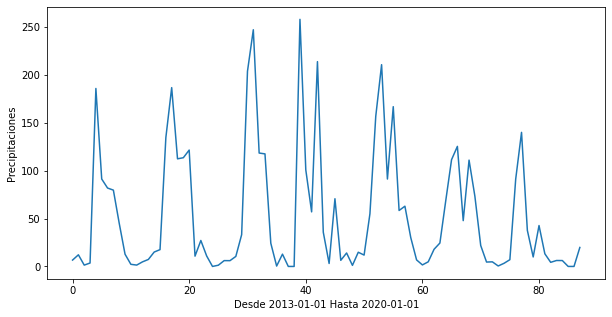

In [66]:
graphseries("Libertador_Gral__Bernardo_O_Higgins", '2013-01-01', '2020-01-01',df_precipitaciones_ord)

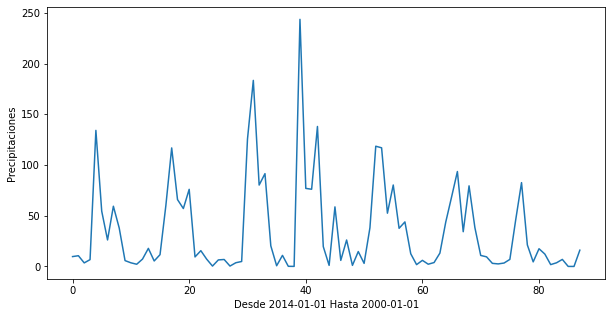

In [67]:
graphseries("Metropolitana_de_Santiago", '2014-01-01', '2000-01-01',df_precipitaciones_ord)

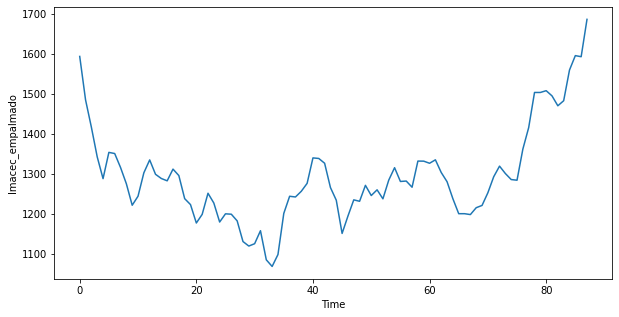

In [68]:
plt.rcParams['figure.figsize'] = (10, 5)
climate_change = pd.read_csv("/content/gdrive/MyDrive/dataspike/banco_central.csv")
fig, ax = plt.subplots()
ax.plot(df_banco1.index, df_banco1["Precio_de_la_onza_troy_de_oro_dolaresoz"]);
ax.set_xlabel("Time");
ax.set_ylabel("Imacec_empalmado");


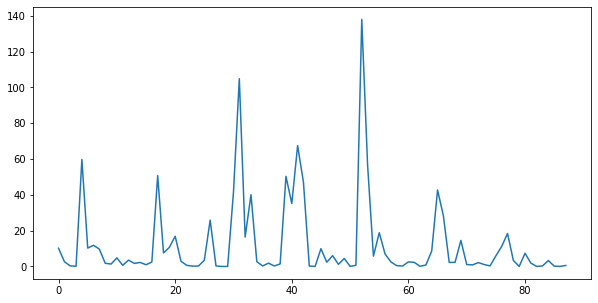

In [69]:
plt.rcParams['figure.figsize'] = (10, 5)
fig, ax = plt.subplots()
ax.plot(df_precipitaciones_ord.index, df_precipitaciones_ord["Coquimbo"]);


4. Tratamiento y creación de variables

• ¿Cómo podríamos evaluar la correlación entre las distintas series de tiempo y cómo se tienen que correlacionar para entrenar un modelo? ¿Mucha correlación, no
correlacionadas, da igual? - R: matrix de correlacion, correlación no implica causalidad, hay que evaluar en cada caso.

• Para el entrenamiento del modelo, queremos predecir el precio de la leche para el productor en Chile. Para eso, descarga el archivo precio_leche.csv y haz un merge con las bases de datos de precipitaciones y datos del Banco Central. R: Esto esta OK.

*Este archivo tiene una columna de año, mes y precio_leche (que corresponde al
precio nominal, sin IVA, en pesos chilenos por litro), por lo que vas a tener que crear la columna de fecha que calce con la de las otras bases. R: Esto esta OK.

• Crea las variables: o A partir de la variable fecha, crea nuevas variables para el año, mes, trimestre. o Lags y estadísticas acumuladas (por ejemplo:  promedio, varianza) de las variables que consideres relevantes.


In [72]:
df_banco1.corr(method ='pearson')

,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Ventas_autos_nuevos
Precio_de_la_onza_troy_de_oro_dolaresoz,1.000000,0.254413,0.128667,-0.119448,0.116763,0.080103,-0.083515,-0.031132
Precio_de_la_onza_troy_de_plata_dolaresoz,0.254413,1.000000,0.360584,0.250096,0.351208,0.344684,0.196253,0.004277
Precio_del_diesel_centavos_de_dolargalon,0.128667,0.360584,1.000000,0.796679,0.995633,0.986513,0.838789,0.370223
Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,-0.119448,0.250096,0.796679,1.000000,0.791438,0.793475,0.801049,0.251346
Precio_del_petroleo_Brent_dolaresbarril,0.116763,0.351208,0.995633,0.791438,1.000000,0.992526,0.841027,0.356855
Precio_del_petroleo_WTI_dolaresbarril,0.080103,0.344684,0.986513,0.793475,0.992526,1.000000,0.833667,0.333150
Precio_del_propano_centavos_de_dolargalon_DTN,-0.083515,0.196253,0.838789,0.801049,0.841027,0.833667,1.000000,0.472046
Ventas_autos_nuevos,-0.031132,0.004277,0.370223,0.251346,0.356855,0.333150,0.472046,1.000000


In [73]:
def monthToNum(shortMonth):
  return{
      "Ene" : "01",
      "Feb" : "02",
      "Mar" : "03",
      "Abr" : "04",
      "May" : "05",
      "Jun" : "06",
      "Jul" : "07",
      "Ago" : "08",
      "Sep" : "09",
      "Oct" : "10",
      "Nov" : "11",
      "Dic" : "12"
}[shortMonth]

In [75]:
df_precio_leche = pd.read_csv (r'/content/gdrive/MyDrive/dataspike/precio_leche.csv')
df_precio_leche.head()

# Using DataFrame.insert() to add a column
date_time_obj = datetime.strptime('2000-01-01', '%Y-%m-%d')
datecol = [date_time_obj] * df_precio_leche.size
df_precio_leche.insert(2, "date", date_time_obj, True)

for ind in df_precio_leche.index:
  datestring = str(df_precio_leche['Anio'][ind])  +"-"+ monthToNum(df_precio_leche['Mes'][ind]) + "-01"
  df_precio_leche['date'][ind] = datestring

print(df_precio_leche)


     Anio  Mes        date  Precio_leche
0    1979  Ene  1979-01-01          3.85
1    1979  Feb  1979-02-01          4.58
2    1979  Mar  1979-03-01          5.18
3    1979  Abr  1979-04-01          6.06
4    1979  May  1979-05-01          7.25
..    ...  ...         ...           ...
501  2020  Oct  2020-10-01        274.32
502  2020  Nov  2020-11-01        288.09
503  2020  Dic  2020-12-01        287.29
504  2021  Ene  2021-01-01        287.60
505  2021  Feb  2021-02-01        295.24

[506 rows x 4 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [84]:
valor = df_banco1.loc[df_banco1['Periodo'] == '2008-11-01']

#df_banco_2 = df_banco.head(496)
#df_precioleche_2 = df_precio_leche.head(496)

df_banco_2 = df_banco1
df_precioleche_2 = df_precio_leche.head(88)

df_banco_2 = df_banco_2.iloc[: , 1:]
print(df_banco_2)
df_precioleche_2 = df_precioleche_2.iloc[: , 3:]
print(df_precioleche_2)

for ind in df_precipitaciones_ord.index:
  fechabuscar = df_precipitaciones_ord['date'][ind]
  valor = df_banco1.loc[df_banco1['Periodo'] == fechabuscar]
  valor2 = df_precio_leche.loc[df_precio_leche['date'] == fechabuscar]
  if len(valor) != 0 & len(valor2) != 0:
    df_banco_2.iloc[ind] = valor.iloc[0]
    df_precioleche_2.iloc[ind] = valor2.iloc[0]

print(df_banco_2)

result = pd.concat([df_precipitaciones_ord,df_banco_2], axis=1)
result2 = pd.concat([result,df_precioleche_2], axis=1)
print(result2)
result2.to_csv(r'/content/gdrive/MyDrive/dataspike/result2.csv')


   Imacec_empalmado  ... Ventas_autos_nuevos
0               102  ...             28577.0
1               101  ...             32206.0
2               101  ...             31589.0
3               998  ...             28457.0
4               964  ...             31736.0
..              ...  ...                 ...
83              122  ...             31090.0
84              110  ...             32104.0
85              106  ...             25025.0
86              114  ...             19177.0
87              988  ...              8906.0

[88 rows x 84 columns]
    Precio_leche
0           3.85
1           4.58
2           5.18
3           6.06
4           7.25
..           ...
83         15.36
84         15.75
85         15.96
86         18.96
87         19.79

[88 rows x 1 columns]
   Imacec_empalmado  ... Ventas_autos_nuevos
0               102  ...             28577.0
1               101  ...             32206.0
2               101  ...             31589.0
3               998  ...     

Merge datos precio_leche con precipitaciones y banco_central

5. Modelo

• Entrena un modelo que permita predecir el precio de la leche el próximo mes, en función de los datos entregados. o Si necesitas crear variables adicionales que pueden aportar información al modelo, tienes total libertad. R: Esto esta OK, se puede hacer la predicción con las variables que uno elija de las entregadas.

• Construye una base de test (o de cross validation). ¿Cuál fue tu definición de
tiempo/cantidad de datos para este set de datos? Explica por qué la elegiste así. R: Esto esta OK, se elije una base de test del 30% por razones practicas.

• ¿Qué datos adicionales te gustaría tener?¿Qué datos son necesarios para que este modelo funcione/mejore las métricas?. R: Seria bueno tener otros datos meteorológicos, como temperatura, viento, etc.

• ¿Cómo evalúas el resultado del modelo?¿Qué métricas tiene sentido mirar?
R: generalmente la precisión se evalua con una metrica como Accuracy.

• ¿Para qué aplicaciones puede servir un modelo de este tipo? En particular, ¿Cómo podría ayudar a combatir el cambio climático? - R: Perfectamente un modelo de este tipo puede servir para combatir el cambio climatico, prediciendo los precios en función de las lluvias, se podría planificar la prducción en años poco lluviosos.

In [85]:
clfreg = LinearRegression(n_jobs=-1)


In [96]:
X = result2[['Coquimbo',
             'Valparaiso',
             'Metropolitana_de_Santiago',
             'Libertador_Gral__Bernardo_O_Higgins',
             'Maule',
             'Biobio',
             'La_Araucania',
             'Los_Rios',
             'Imacec_empalmado',
             'Imacec_produccion_de_bienes',
             'Imacec_minero',
             'Imacec_industria',
             'Imacec_resto_de_bienes',
             'Imacec_comercio',
             'Imacec_servicios',
             'Imacec_a_costo_de_factores',
             'PIB_Agropecuario_silvicola',
             'PIB_Pesca',
             'PIB_Mineria',
             'PIB_Mineria_del_cobre',
             'PIB_Otras_actividades_mineras',
             'PIB_Industria_Manufacturera']]

y = result2[['Precio_leche']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
clfreg.predict(np.array([[0,0,4,10,50,109,156,234,
                          102,10,978,102,114,110,100,103,103,579,570,123,110,131]])) 

array([[-0.17815846]])